## Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as sp
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import mne
import os
import sys
#sys.path.append(os.path.abspath("../src"))
from functions import *


correct_counts = True

## Load pre/post-stim reference matrices + irrev values, load into the behavior dataframe

In [ ]:
project_directory = os.path.dirname(os.path.dirname(os.path.abspath("clean_analysis_dataset1")))

df = pd.read_csv(os.path.join(project_directory, r"data", r"behavior_dataset1.csv"))

prestim_ref_mat = scipy.io.loadmat(os.path.join(project_directory, r"data", r"FowRev_long_192to255_tau5.mat"))['ref_mats']
poststim_ref_mat = scipy.io.loadmat(os.path.join(project_directory, r"data", r"FowRev_long_256to319_tau5.mat"))['ref_mats']
df['prestim_ref_mat'] = [prestim_ref_mat[i] for i in range(prestim_ref_mat.shape[0])]
df['prestim_irrev'] = df['prestim_ref_mat'].apply(lambda arr: np.mean(arr))
df['poststim_ref_mat'] = [poststim_ref_mat[i] for i in range(poststim_ref_mat.shape[0])]
df['poststim_irrev'] = df['poststim_ref_mat'].apply(lambda arr: np.mean(arr))

#df['stim_diff'] = (df['poststim_irrev'] - df['prestim_irrev'])

df['log_prestim'] = np.log(df['prestim_irrev'])
df['log_poststim'] = np.log(df['poststim_irrev'])


df.head()

,Unnamed: 0,subject,drug,session,block,miniblock,trial_nr,cue,location,cue_val,stimulus,response,correct,RT,total_trial,bl_pupil,bl_pupil_bin,prestim_ref_mat,prestim_irrev
0,0,1,DNP,0,1,0,316,1,1,1,1,1,1,700.413423,0,4357.233196,4,"[[0.0, 0.0006873881373122065, 0.00016213735834...",0.002365
1,1,1,DNP,0,1,0,318,1,1,1,1,1,1,625.350154,1,4399.359772,4,"[[0.0, 0.040240608719263854, 0.000460120231847...",0.003315
2,2,1,DNP,0,1,0,319,0,1,0,1,1,1,775.374966,2,4523.822666,4,"[[0.0, 0.00011810852016698719, 1.5823859782963...",0.002592
3,3,1,DNP,0,1,0,320,1,1,1,1,1,1,700.344298,3,4433.337541,4,"[[0.0, 6.157323424213391e-05, 0.00035627791271...",0.003637
4,4,1,DNP,0,1,0,321,1,1,1,0,1,0,775.313991,4,4296.816038,3,"[[0.0, 0.005253544828395134, 0.001778205067022...",0.004256


In [ ]:
# prestim_channel_alpha = np.load(os.path.join(project_directory, r"data", r"prestim_channel_alphapower.npy"))
# prestim_mean_alpha = np.mean(prestim_channel_alpha, axis=1)
# df['prestim_mean_alpha'] = prestim_mean_alpha
# poststim_channel_alpha = np.load(os.path.join(project_directory, r"data", r"poststim_channel_alphapower.npy"))
# poststim_mean_alpha = np.mean(poststim_channel_alpha, axis=1)
# df['poststim_mean_alpha'] = poststim_mean_alpha

# df['trial'] = df.index

# pre_sampEn_bychannel_array = np.load(os.path.join(project_directory, r"data", r"prestim_sampEn_bychannel.npy"))
# list1 = [pre_sampEn_bychannel_array[i] for i in range(pre_sampEn_bychannel_array.shape[0])]
# df['prestim_sampen_bychannel'] = list1
# df['prestim_sampen_mean'] = df['prestim_sampen_bychannel'].apply(lambda x: np.mean(x))

# post_sampEn_bychannel_array = np.load(os.path.join(project_directory, r"data", r"poststim_sampEn_bychannel.npy"))
# list1 = [post_sampEn_bychannel_array[i] for i in range(post_sampEn_bychannel_array.shape[0])]
# df['poststim_sampen_bychannel'] = list1
# df['poststim_sampen_mean'] = df['poststim_sampen_bychannel'].apply(lambda x: np.mean(x))



# df['prestim_heirarchy'] = [np.std(matrix) for matrix in df['prestim_ref_mat']]
# # post -- 
# df['poststim_heirarchy'] = [np.std(matrix) for matrix in df['poststim_ref_mat']]

## Binning:

bl_pupil_bin
0    3306.142539
1    3485.883558
2    3588.134960
3    3691.694810
4    3877.785733
Name: bl_pupil, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_2784\2173767366.py:24: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(1),('d')), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_2784\2173767366.py:26: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(2),('d')), 0)


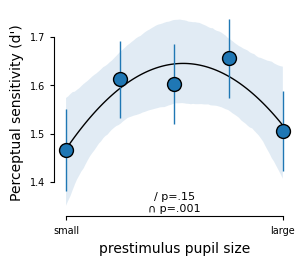

In [8]:
# ALL DRUGS

# Loading behavioral data
behavior = df

cfg = {'n_bins': 5}  # Number of pupil bins
behavior['bl_pupil_bin'] = behavior.groupby(['subject', 'drug', 'block'])['bl_pupil'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

df_group = behavior.sort_values(by=['subject','session','block'])

        # make bins
df_group['bl_pupil_bin'] = np.concatenate(np.ravel(df_group.groupby(['subject','session','block'])['bl_pupil'].agg(
        lambda x: list(pd.qcut(x, cfg['n_bins'],labels = range(cfg['n_bins']))))))

correct_counts = True
df_sdt = df_group.groupby(['subject','drug','bl_pupil_bin']).apply(lambda x: sdt(x, correct_counts))

df_subject = df_sdt.groupby(['subject', 'bl_pupil_bin']).mean()
df_subject.reset_index(inplace=True)

print(behavior.groupby('bl_pupil_bin').mean()['bl_pupil'])

betas_first = dict()
_, betas_first['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(1),('d')), 0)
betas_second = dict()
_, betas_second['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(2),('d')), 0)


# Plotting results for d'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(8*cm, 7*cm))

ym = df_sdt.groupby('bl_pupil_bin').mean()['d']
yerr = df_sdt.groupby('bl_pupil_bin').sem()['d']
ax.errorbar(range(cfg['n_bins']), ym, yerr=yerr, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='k')

p_val_linear = betas_first['d']
p_val_quadratic = betas_second['d']

# Initialize variables to decide which model to plot
plot_linear = False
plot_quadratic = False

# Determine which model to plot based on the significance and smaller p-value
if p_val_linear < 0.05 or p_val_quadratic < 0.05:
    if p_val_linear < p_val_quadratic:
        plot_linear = True
    elif p_val_quadratic < p_val_linear:
        plot_quadratic = True

# Optionally add model fits if linear/quadratic fit was significant
if plot_linear:
    sns.regplot(ax=ax, data=df_subject, x="bl_pupil_bin", y="d", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=1, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

if plot_quadratic:
    sns.regplot(ax=ax, data=df_subject, x="bl_pupil_bin", y="d", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=2, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ {}\n∩ {}'.format(p_val_string(betas_first['d']),
                                        p_val_string(betas_second['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8)

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Perceptual sensitivity (d\')')
ax.set_xlabel('prestimulus pupil size')
ax.set_xticks([0,cfg['n_bins']-1])
ax.set_xticklabels(['small', 'large']) 
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

fig.tight_layout()
plt.show()